C:\Temp/ipykernel_13428/1662439297.py:70: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


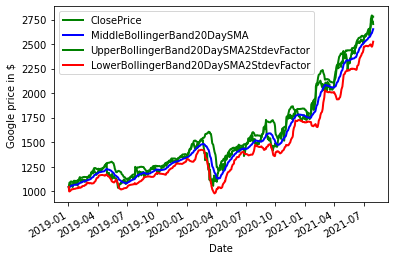

In [7]:
# Implementation of Bollinger bands 

import pandas as pd
import matplotlib.pyplot as plt
import statistics as stats
import math as math
from pandas_datareader import data

start_data = '2019-01-01'
end_data = '2021-08-01'
FILENAME = 'goog_data_2019_2021.pkl'

try:
    goog_data = pd.read_pickle(FILENAME)
except FileNotFoundError:
    goog_data = data.DataReader('GOOG', 'yahoo', start_data, end_data)
    goog_data.to_pickle(FILENAME)

close = goog_data['Close']

time_period = 20
stdev_factor = 2

history = []
sma_values = []
upper_band = []
lower_band = []

for close_price in close:
    history.append(close_price)
    if len(history) > time_period:
        del(history[0])

    sma = stats.mean(history)    
    sma_values.append(sma)

    variance = 0

    for history_price in history:
        variance = variance + ((history_price - sma) ** 2)
    
    stdev = math.sqrt(variance / len(history))
    upper_band.append(sma + stdev_factor * stdev)
    lower_band.append(sma - stdev_factor * stdev)

# print(goog_data)

goog_data = goog_data.assign(
    ClosePrice=pd.Series(close, index=goog_data.index))
goog_data = goog_data.assign(
    MiddleBollingerBand20DaySMA=pd.Series(sma_values, index=goog_data.index))
goog_data = goog_data.assign(
    MiddleBollingerBand20DaySMA=pd.Series(sma_values, index=goog_data.index))
goog_data = goog_data.assign(
    UpperBollingerBand20DaySMA2StdevFactor=pd.Series(upper_band, index=goog_data.index))
goog_data = goog_data.assign(
    LowerBollingerBand20DaySMA2StdevFactor=pd.Series(lower_band, index=goog_data.index))

close_price = goog_data['ClosePrice']
mband = goog_data['MiddleBollingerBand20DaySMA']
uband = goog_data['UpperBollingerBand20DaySMA2StdevFactor']
lband = goog_data['LowerBollingerBand20DaySMA2StdevFactor']

fig = plt.figure()
ax1 = fig.add_subplot(111, ylabel='Google price in $')
close_price.plot(ax=ax1, color='g', lw=2., legend=True)
mband.plot(ax=ax1, color='b', lw=2., legend=True)
uband.plot(ax=ax1, color='y', lw=2., legend=True)
lband.plot(ax=ax1, color='r', lw=2., legend=True)
fig.show()
